# Beta-diversity analyses of FW and RV

I (RACS) will use beta-diversity analysis to check the differences in community dissimilarity between feature tables generated with forward and reverse reads. 

Files `q20_fw_feature-table.tsv` and `q20_rv_feature-table.tsv` represent feature tables from the two analyses, using minimum quality of 20 in cutadapt and minimum read lengh of 50bp.

## Choosing value for sampling depth

Before running the actual diversity metrics computation, a sampling depth must be chosen. I (RACS) followed the guidelines on the Qiime2 [Moving Pictures tutorial](https://docs.qiime2.org/2024.2/tutorials/moving-pictures/).

In [11]:
import pandas as pd
import matplotlib

# Read the table into a dataframe
feature_table_fw_df = pd.read_table('q20_fw_feature-table.tsv')

# Set the ASV column as the index
feature_table_fw_df.set_index('ASV', inplace=True)

# Display the dataframe
feature_table_fw_df.head()

,SRR6665476,SRR6665477,SRR6665478,SRR6665479,SRR6665480,SRR6665481,SRR6665482,SRR6665483,SRR6665484,SRR6665485,...,SRR6666058,SRR6666059,SRR6666060,SRR6666061,SRR6666062,SRR6666063,SRR6666064,SRR6666065,SRR6666066,SRR6666067
ASV,,,,,,,,,,,,,,,,,,,,,
bc664ea528899e36452dd37c1f55a48a,47869.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,78028.0,0.0,0.0,0.0,0.0,0.0,58946.0,3868.0,0.0
232ad9e267688a5d573112b4855bac96,0.0,2727.0,4065.0,27528.0,7244.0,3035.0,2433.0,847.0,2351.0,830.0,...,18215.0,0.0,9866.0,13921.0,29850.0,1713.0,11708.0,0.0,0.0,3469.0
6967c9a10eff11f751218e759df28ab7,0.0,610.0,4147.0,267.0,6479.0,7206.0,6862.0,7565.0,12271.0,1298.0,...,742.0,0.0,12448.0,225.0,7830.0,47503.0,1241.0,0.0,0.0,920.0
fa79d5937f424b58a27843dfff8bdcd4,0.0,1837.0,2993.0,18227.0,4525.0,1975.0,1701.0,545.0,1492.0,567.0,...,12277.0,0.0,6519.0,8965.0,22337.0,1113.0,7897.0,0.0,0.0,2223.0
e6b96dce8fbd261b8836b93b9a1d5e07,0.0,1767.0,3093.0,19988.0,5185.0,2100.0,1768.0,542.0,1485.0,603.0,...,11994.0,0.0,6479.0,9388.0,25538.0,1041.0,7923.0,0.0,0.0,2095.0


In [24]:
feature_table_fw_df.sum().sort_values(ascending=False).head(20)

SRR6665637    5973582.0
SRR6665949    4524392.0
SRR6665953    4029447.0
SRR6665784    1765712.0
SRR6665640    1737741.0
SRR6665862    1693573.0
SRR6665979    1433476.0
SRR6665833    1368391.0
SRR6665980    1351522.0
SRR6665916    1121746.0
SRR6665713    1088866.0
SRR6665587    1061684.0
SRR6665915    1052466.0
SRR6665586     817022.0
SRR6665863     768725.0
SRR6665708     718285.0
SRR6665618     691513.0
SRR6665650     676114.0
SRR6665613     661171.0
SRR6666015     656762.0
dtype: float64

<Axes: >

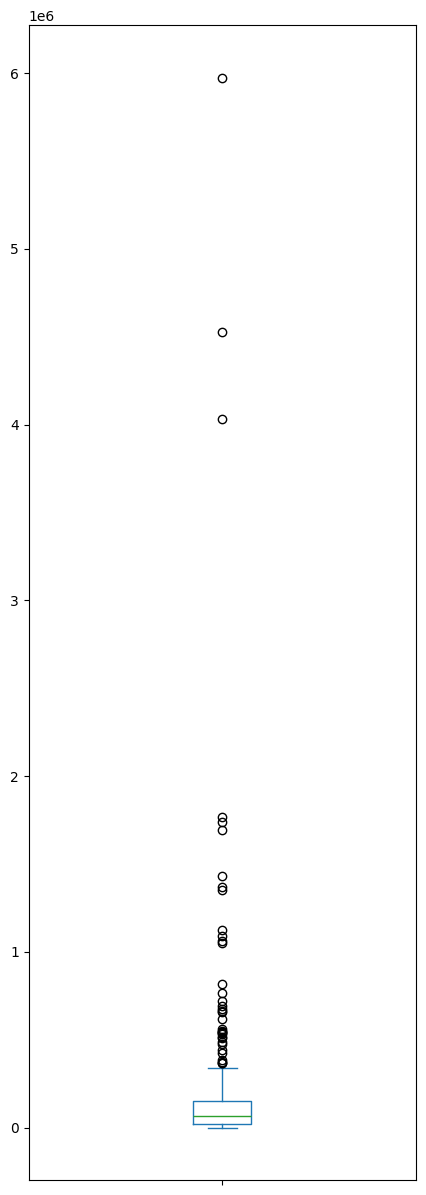

In [25]:
feature_table_fw_df.sum().plot(kind='box', figsize=(5, 15))

<Axes: >

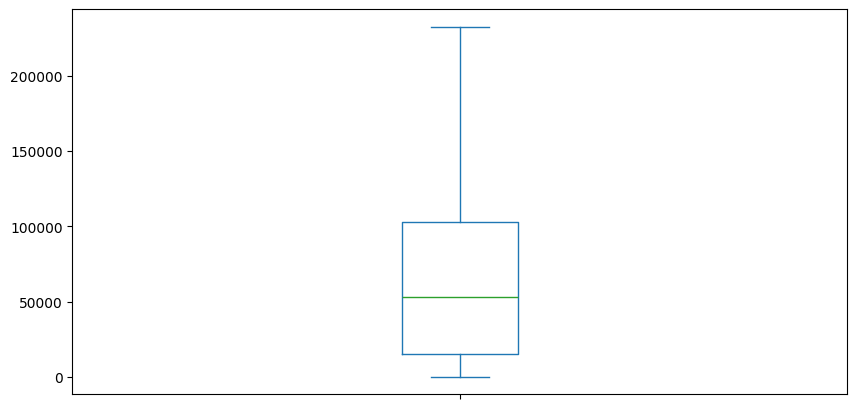

In [44]:
feature_table_fw_df.sum().sort_values(ascending=False)[85:].plot(kind='box', figsize=(10, 5))

In [54]:
sample_sizes_fw_no_outliers = feature_table_fw_df.sum().sort_values(ascending=False)[85:]

In [55]:
sample_sizes_fw_no_outliers.shape

(507,)

In [58]:
len(sample_sizes_fw_no_outliers)

507

In [57]:
sample_sizes_fw_no_outliers.head()

SRR6665563    232643.0
SRR6665736    231455.0
SRR6665627    230874.0
SRR6665607    228743.0
SRR6665925    227618.0
dtype: float64

In [61]:
sample_sizes_fw_no_outliers.iloc[506]


203.0

In [71]:
largest_diff_list = ['','',0]
largest_diff_list

['', '', 0]

In [79]:
largest_diff_list = ['','',0,0]

for index in range(len(sample_sizes_fw_no_outliers)-1):
    if (sample_sizes_fw_no_outliers.iloc[index] - sample_sizes_fw_no_outliers.iloc[index+1]) > largest_diff_list[2]:
        largest_diff_list = [sample_sizes_fw_no_outliers.index[index], sample_sizes_fw_no_outliers.index[index+1], sample_sizes_fw_no_outliers.iloc[index] - sample_sizes_fw_no_outliers.iloc[index+1], index]

print(largest_diff_list)

['SRR6665751', 'SRR6665700', 5475.0, 20]


In [80]:
differences_list = []

for index in range(len(sample_sizes_fw_no_outliers)-1):
    differences_list.append(sample_sizes_fw_no_outliers.iloc[index] - sample_sizes_fw_no_outliers.iloc[index+1])

In [77]:
sample_sizes_fw_no_outliers['SRR6665751'] 

205382.0

In [78]:
sample_sizes_fw_no_outliers['SRR6665700']

199907.0

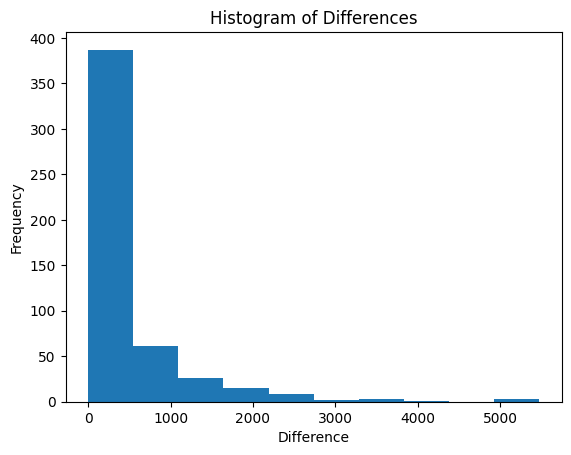

In [81]:
import matplotlib.pyplot as plt

plt.hist(differences_list, bins=10)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Differences')
plt.show()

In [88]:
largest_diff_list = ['','',0,0]

for index in range(len(sample_sizes_fw_no_outliers)-1):
    if (sample_sizes_fw_no_outliers.iloc[index] - sample_sizes_fw_no_outliers.iloc[index+1]) > largest_diff_list[2] and\
        (sample_sizes_fw_no_outliers.iloc[index] - sample_sizes_fw_no_outliers.iloc[index+1]) < 5000:
        largest_diff_list = [sample_sizes_fw_no_outliers.index[index], sample_sizes_fw_no_outliers.index[index+1], sample_sizes_fw_no_outliers.iloc[index] - sample_sizes_fw_no_outliers.iloc[index+1], index]

print(largest_diff_list)

['SRR6665584', 'SRR6666024', 4967.0, 71]


In [90]:
lower_quartile = sample_sizes_fw_no_outliers.quantile(0.25)
lower_quartile

15496.0

In [93]:
filtered_series = sample_sizes_fw_no_outliers[sample_sizes_fw_no_outliers > 15496.0]


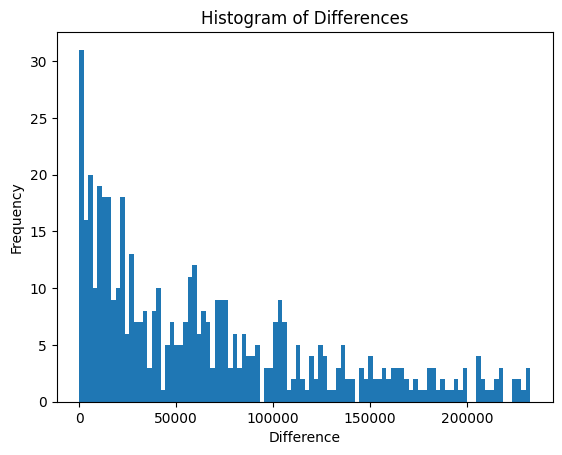

In [97]:
import matplotlib.pyplot as plt

plt.hist(sample_sizes_fw_no_outliers, bins=100)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Differences')
plt.show()

In [94]:
len(filtered_series)

380

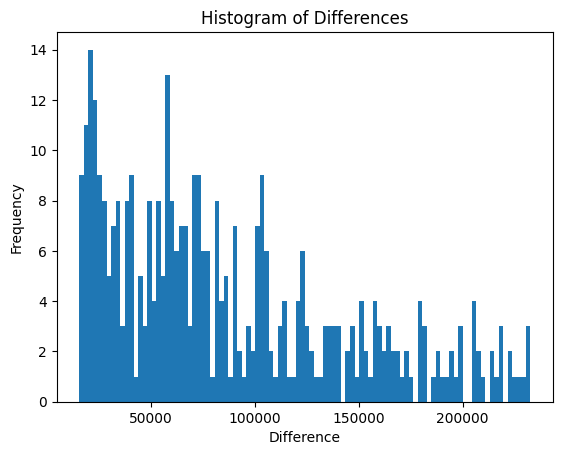

In [98]:
import matplotlib.pyplot as plt

plt.hist(filtered_series, bins=100)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Differences')
plt.show()

Based on this initial data analysis, I (RACS) will use 15496 (lower quartile after filtering out outliers - samples with very high size) as the sampling depth.